# Clustering

Before I get into predictions, I want to use K Means clustering to determine if there are any subtle patterns in the data that I didn't notice earlier.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# color palette 
import matplotlib.colors as cplt
c1 = '#6DB1BF' # Maximum Blue
c2 = '#315659' # Dark Slate Gray
c3 = '#FCAA67' # Sandy Brown
c4 = '#F98948' # Mango Tango
c5 = '#C0DA74' # Yellow Green Crayola
c6 = '#859750' # Moss Green
c7 = '#B0A1BA' # Heliotrope Gray

data = pd.read_csv('Data/Processed.csv',index_col='URLs')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38257 entries, http://mashable.com/2013/01/07/cosmic-events-doomsday/ to http://mashable.com/2014/12/26/wacky-kickstarter-projects-2014/
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shares                 38257 non-null  int64  
 1   title_neg_polarity     38257 non-null  float64
 2   title_neu_polarity     38257 non-null  float64
 3   title_pos_polarity     38257 non-null  float64
 4   title_avg_polarity     38257 non-null  float64
 5   title_subjectivity     38257 non-null  float64
 6   n_tokens_title         38257 non-null  int64  
 7   text_neg_polarity      38257 non-null  float64
 8   text_neu_polarity      38257 non-null  float64
 9   text_pos_polarity      38257 non-null  float64
 10  text_avg_polarity      38257 non-null  float64
 11  text_subjectivity      38257 non-null  float64
 12  n_tokens_text          38257 non-null  int64  
 13  

## How Many Clusters
But before I get into clustering, I need to know how many clusters to create. I'll be using the 'elbow' method for this, aka creating numerous models with different amounts of cluster to see when the model tends to start overfitting.

In [5]:
shares = data['shares']
data = data.drop(columns='shares')

K_range = range(1,10)
inertia = []

for k in K_range:
    scaler = StandardScaler()
    scaler.fit(data)
    scaler.transform(data)
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

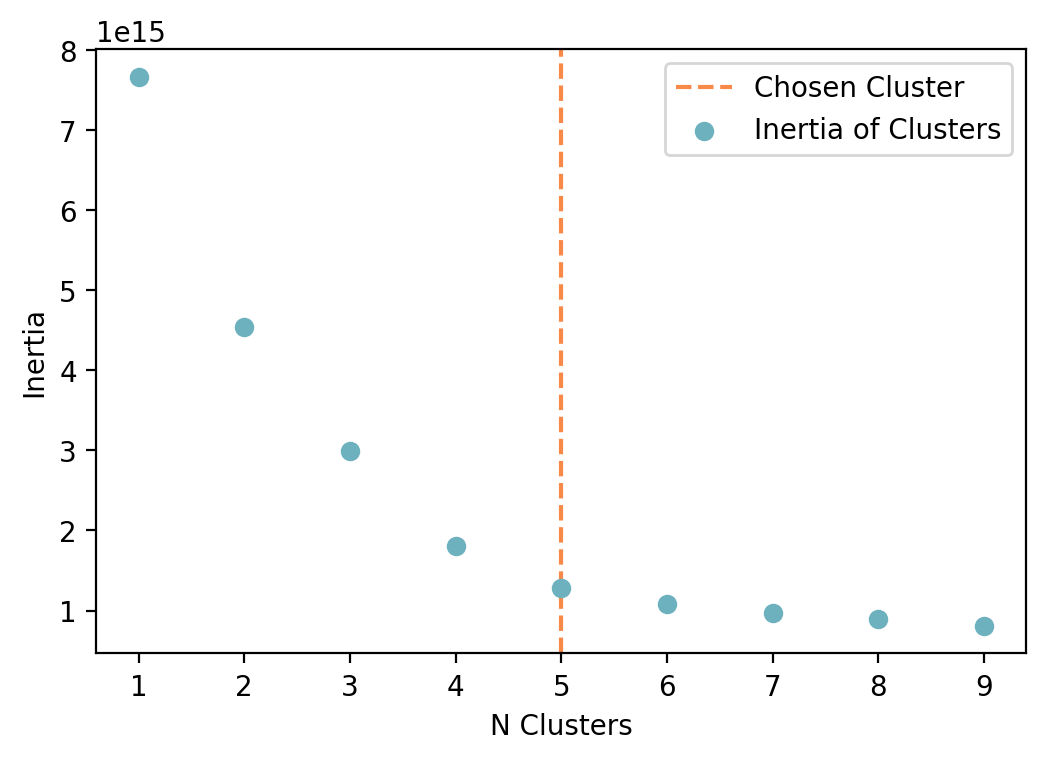

In [6]:
plt.figure(figsize=(6,4),dpi=200)
plt.axvline(4,linestyle='--',c=c3,zorder=0,label='Chosen Cluster')
plt.scatter(K_range,inertia,c=c1,zorder=1,label='Inertia of Clusters')
plt.legend()
plt.ylabel('Inertia')
plt.xlabel('N Clusters');

I'm going to use four clusters, since any more looks like its overfitting.

## Making the Model

In [8]:
# specify out n_clusters
k = 4
# create the model
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('cluster', KMeans(n_clusters=k))])
# predict
labels = pipe.fit_predict(data)
# put it all together
data['labels'] = labels+1
data['shares'] = shares
data.labels.value_counts()

In [12]:
len(data.columns)

42

In [9]:
plt.figure(figsize=(16,60),dpi=300)
plt.subplots_adjust(hspace=0.6,wspace=0.3)

cmap = cplt.ListedColormap([c1,c2,c3,c4,c5])

for n,col_name in enumerate(data.select_dtypes('number').columns[:44],start=1):
    range_lim = None
    five_std_lim = model_data_km[col_name].mean() + 3*model_data_km[col_name].std()
    if model_data_km[col_name].max() > five_std_lim:
        range_lim=(model_data_km[col_name].min(),np.percentile(model_data_km[col_name],90))
    
    plt.subplot(14,3,n)
    sns.histplot(data=model_data_km,
                 x=col_name,hue="label",
                 palette=cmap,
                 bins=10,
                 element='step',
                 legend=False,
                 fill=False,
                 binrange=range_lim)
    plt.title(col_name)
    plt.xlabel(ax_label[n-1])
    
plt.legend(('Cluster 4', 'Cluster 3', 'Cluster 2','Cluster 1'),ncol=4, bbox_to_anchor=(1.2,23.8));

4    11073
1     8817
3     7105
5     6013
2     5249
Name: labels, dtype: int64

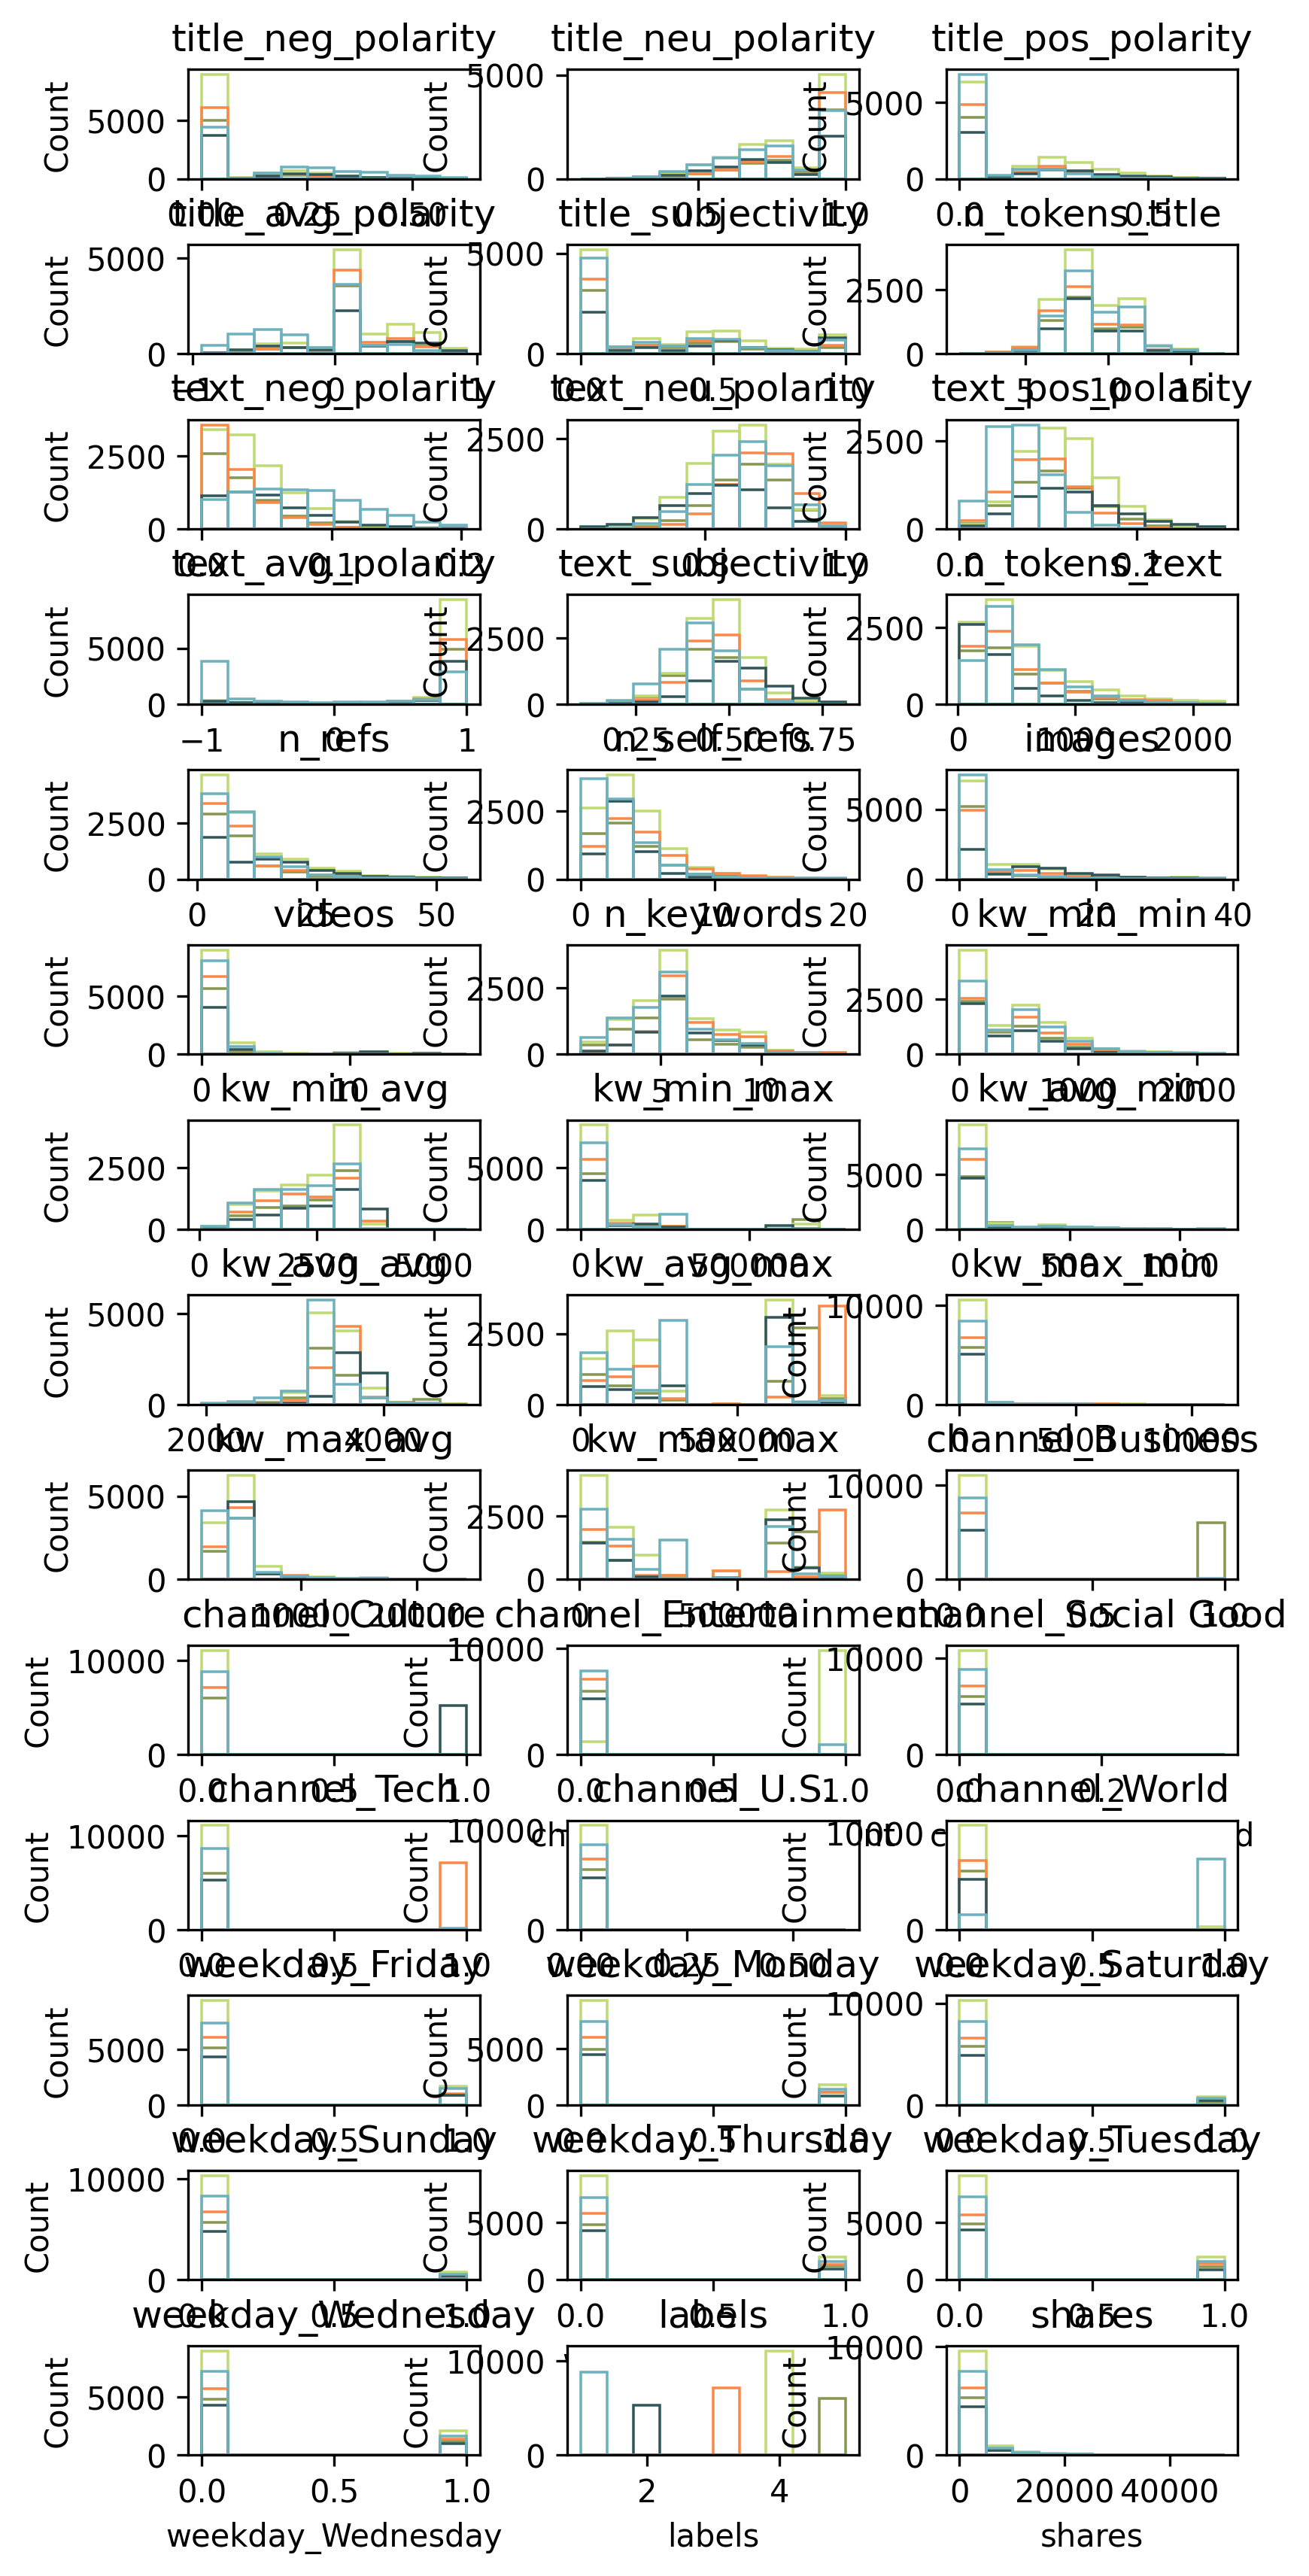

In [19]:
# set the range based on multiples of the std
times = 4

# set up colors
cmap = cplt.ListedColormap([c1,c2,c3,c4,c5])

# collect all numeric feautres
data_numeric = data.select_dtypes(include='number')

# set up plots
plt.figure(figsize=(6,280),dpi=300)
plt.subplots_adjust(hspace=0.6,wspace=0.3)

for n,column in enumerate(data_numeric.columns):
    # set up variables
    std = data_numeric[column].std()
    mean = data_numeric[column].mean()
    min_lim = data_numeric[column].min()
    max_lim = data_numeric[column].max()
    # min lim
    if min_lim < mean-std*times:
        min_lim = mean-std*times
    if max_lim > mean+std*times:
        max_lim = mean+std*times
    # create plot
    plt.subplot(10,3,n+1)        
    sns.histplot(data=data_numeric,x=column,hue="labels", palette=cmap,bins=10,legend=False,element='step',binrange=(min_lim,max_lim),fill=False, common_norm=False,stat='density')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(column)

## PCA

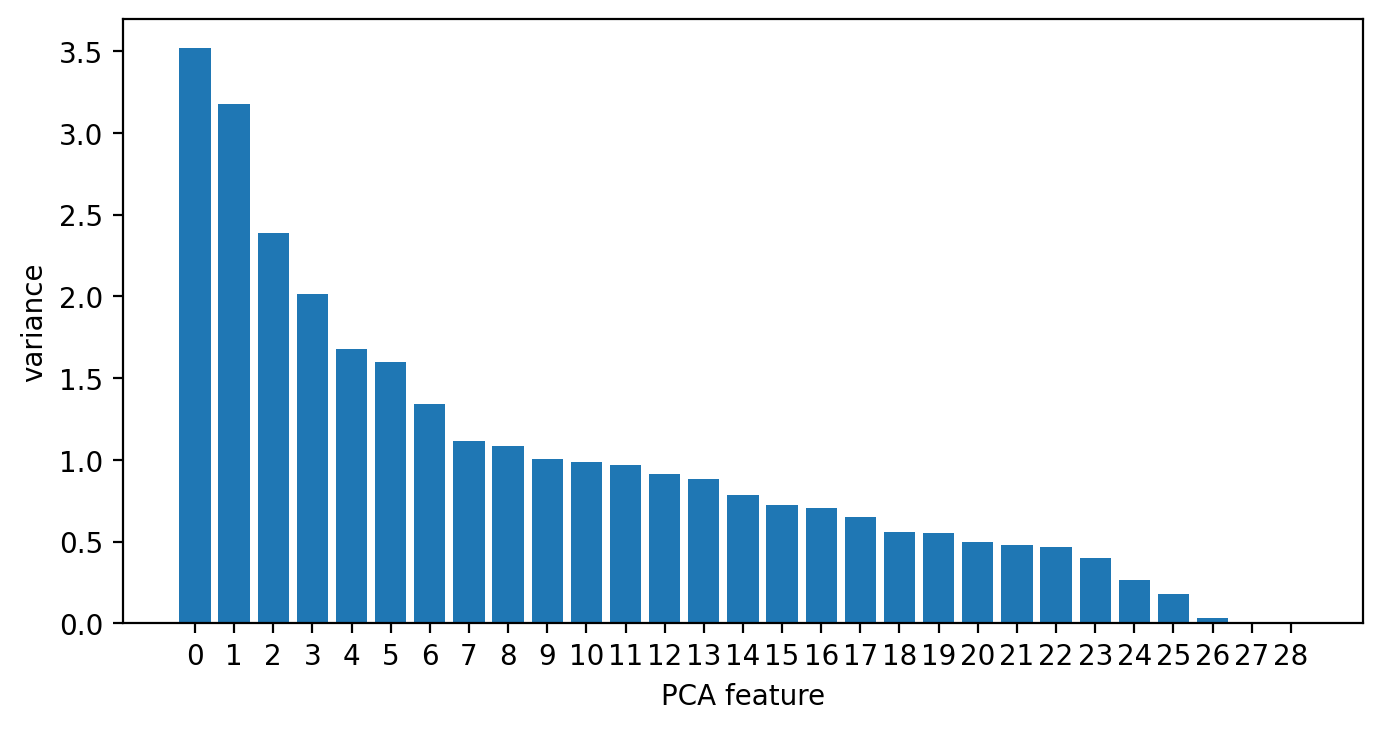

In [22]:
pca_data = data.drop(columns='shares')

# Create PCA instance: model
pca_data = StandardScaler().fit_transform(pca_data)
model = PCA().fit(pca_data)

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.transform(pca_data)
features = pd.DataFrame({'features':range(0,model.n_components_),'varience':model.explained_variance_}).set_index('features')
pca_features = pd.DataFrame(pca_features)

# Plot the explained variances
plt.figure(figsize=(8,4),dpi=200)
plt.bar(features.index,features.varience )
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features.index)
plt.show()

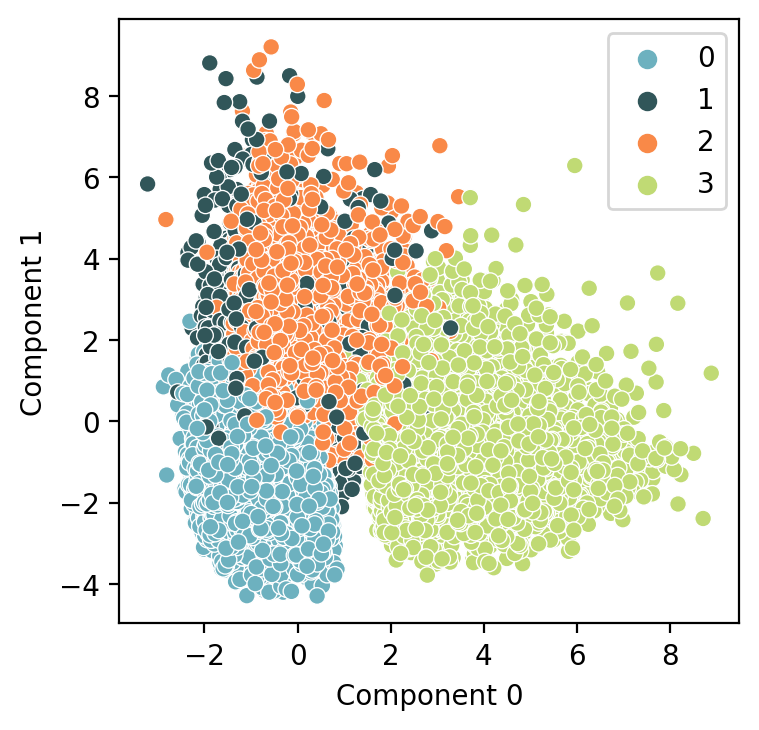

In [38]:
# attach labels to pca components
pca_features['labels'] = data['labels'].values
features_01 = pca_features[[0,1,'labels']].rename(columns={0:'zero',1:'one'})

# Plot
plt.figure(figsize=(4,4),dpi=200)
sns.scatterplot(data=features_01,x='zero',y='one',hue=labels,palette=cmap,legend=True)
plt.xlabel('Component 0')
plt.ylabel('Component 1');